     block, center = (0.25,0,0)
          size (0.5,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0.75,0,0)
          size (0.5,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5,5,5)


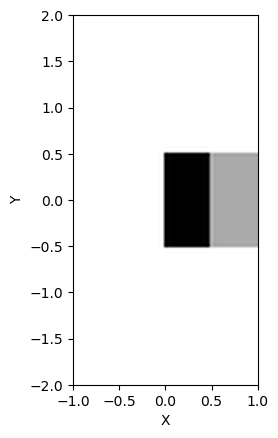

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0.25,0,0)
          size (0.5,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0.75,0,0)
          size (0.5,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 4 and 32 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
27 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.038461538461538464, 0.0, 0.0>
  Vector3<0.07692307692307693, 0.0, 0.0>
  Vector3<0.11538461538461539, 0.0, 0.0>
  Vector3<0.15384615384615385, 0.0, 0.0>
  Vector3<0.19230769

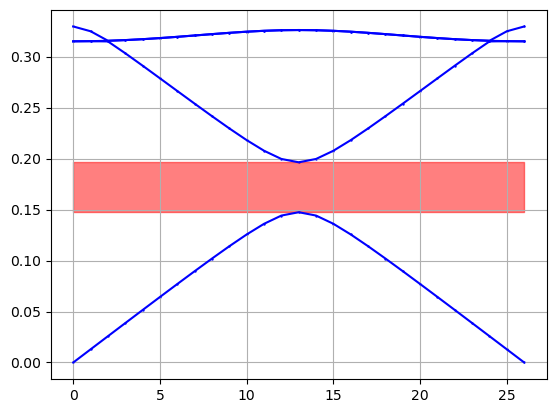

In [18]:
import math as m
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt


num_bands = 4
resolution = 32
#normalizaion
a =0.4
#slab dimensions
d1 = 0.2/a # salb1 thickness
d2 = 0.2/a # slab2 thickness
d = d1+d2 # slab thickness
h = 0.4/a # slab height
#epsilons
eps1 = 13
eps2 = 5

# a1 = d
# define the geometry

geometry_lattice = mp.Lattice(size=mp.Vector3(1,1),
                              basis1=mp.Vector3(1,0))

k_points = [
    mp.Vector3(0,0),
    mp.Vector3(1,0)]
k_points = mp.interpolate(25, k_points)
geometry1 = [
    mp.Block(size=mp.Vector3(d1,h),
    center = mp.Vector3(d1/2,0),
    material=mp.Medium(epsilon=eps1)),
]
geometry2 = [
    mp.Block(size=mp.Vector3(d2,h),
             center=mp.Vector3(d1+d2/2,0),
             material=mp.Medium(epsilon=eps2)),
]

sim = mp.Simulation(resolution=resolution,
                    geometry=geometry1+geometry2,
                    cell_size=mp.Vector3(2,4),
                   )
plt.figure()
sim.plot2D()
plt.show()
ms=mpb.ModeSolver(
    geometry=geometry1+geometry2,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution)

ms.run_tm()

tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

fig, ax = plt.subplots()
x = range(len(tm_freqs))
print(x)
for i,tmz in zip(x, tm_freqs):
    ax.scatter([i]*len(tmz), tmz, color='blue', s=0.5)
ax.plot(tm_freqs, color='blue')
# ax.set_ylim([0, 1])

#plotting gaps 
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x,gap[1], gap[2], color='red', alpha=0.5)


ax.grid(True)
plt.show()